In [ ]:
# this code sample demonstrates how to use tesseract to extract embedded text from an image saved as a pdf file
# because tesseract operates on image files, we need to first convert each page of the pdf to an image
# if your media file is already in image format, you can skip this step.
# we will demonstrate tesseract on two files
# the first is a warning label on a vaping advertisement
# the second is embedded text in a comic strip
# these two cases will illustrate the strenghts and limitations of tesseract
# clearly printed text will render effectively
# embedded text that is not clear and formatted will lead to data loss with tesseract
# note that tesseract is also generally not effective with handwriting

# links:
# warning doc: https://github.com/geoffswc/Libguide-AI-Tools-Archival-Research/raw/main/warning_frame_pdf.pdf
# cartoon/comic: https://github.com/geoffswc/Libguide-AI-Tools-Archival-Research/raw/main/cartoon_frame_pdf.pdf

In [19]:
#!sudo apt-get install poppler-utils
#!sudo apt install tesseract-ocr
#!pip install pytesseract
#!pip install tempfile
#!pip install pdf2image

In [1]:
import pytesseract
import tempfile
import urllib
import os
from PIL import Image
from pdf2image import convert_from_path

In [7]:
def convert_pdf_to_img(pdf_url):
  temp_dir = tempfile.TemporaryDirectory()
  source_file_name = pdf_url.split('/')[-1]
  urllib.request.urlretrieve(pdf_url, source_file_name)
  source_file = os.path.join(source_file_name)
  return convert_from_path(source_file, jpegopt=True)

In [8]:
warning_frame_url = "https://github.com/geoffswc/Libguide-AI-Tools-Archival-Research/raw/main/warning_frame_pdf.pdf"
warning_label_imgs = convert_pdf_to_img(warning_frame_url)

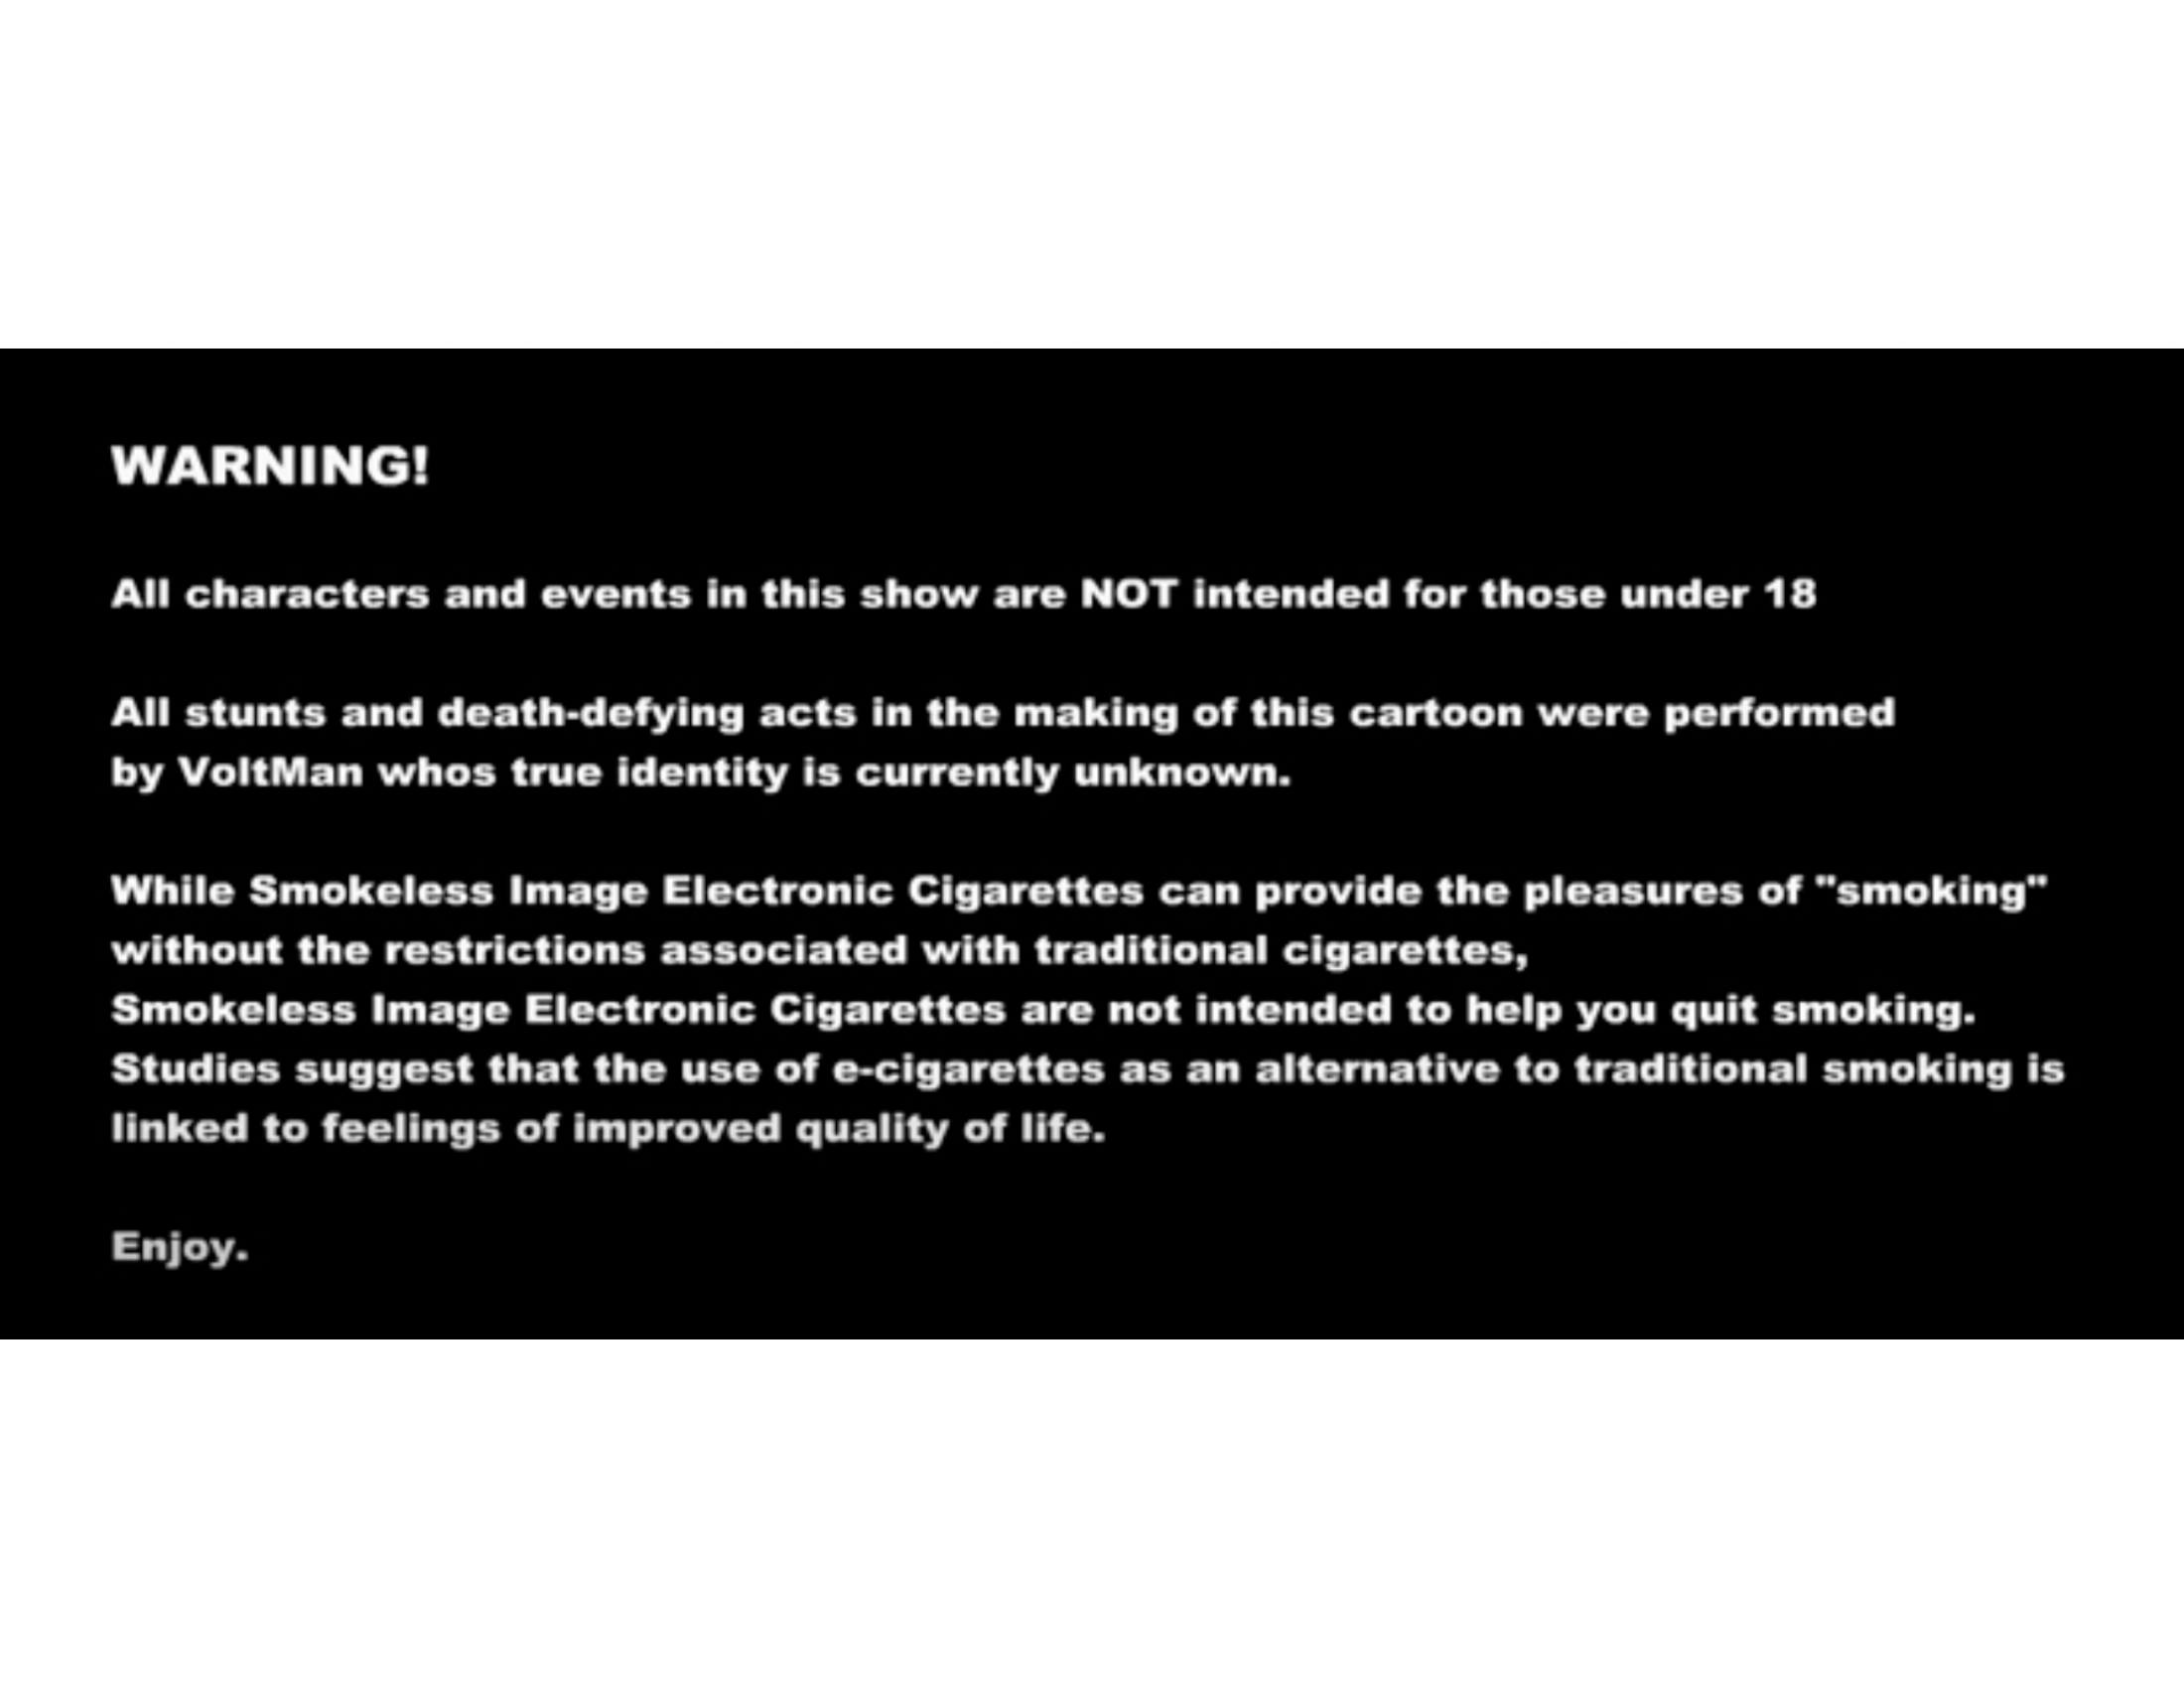

In [9]:
warning_label_imgs[0]

In [10]:
warning_label_string = pytesseract.image_to_string(warning_label_imgs[0])
print(warning_label_string)

 

WARNING!

All characters and events in this show are NOT intended for those under 18

All stunts and death-defying acts in the making of this cartoon were performed
by VoltMan whos true identity is currently unknown.

While Smokeless Image Electronic Cigarettes can provide the pleasures of “smoking”
without the restrictions associated with traditional cigarettes,

Smokeless Image Electronic Cigarettes are not intended to help you quit smoking.
Studies suggest that the use of e-cigarettes as an alternative to traditional smoking is
linked to feelings of improved quality of life.

Enjoy.

 



In [11]:
cartoon_frame_url = "https://github.com/geoffswc/Libguide-AI-Tools-Archival-Research/raw/main/cartoon_frame_pdf.pdf"
cartoon_imgs = convert_pdf_to_img(cartoon_frame_url)

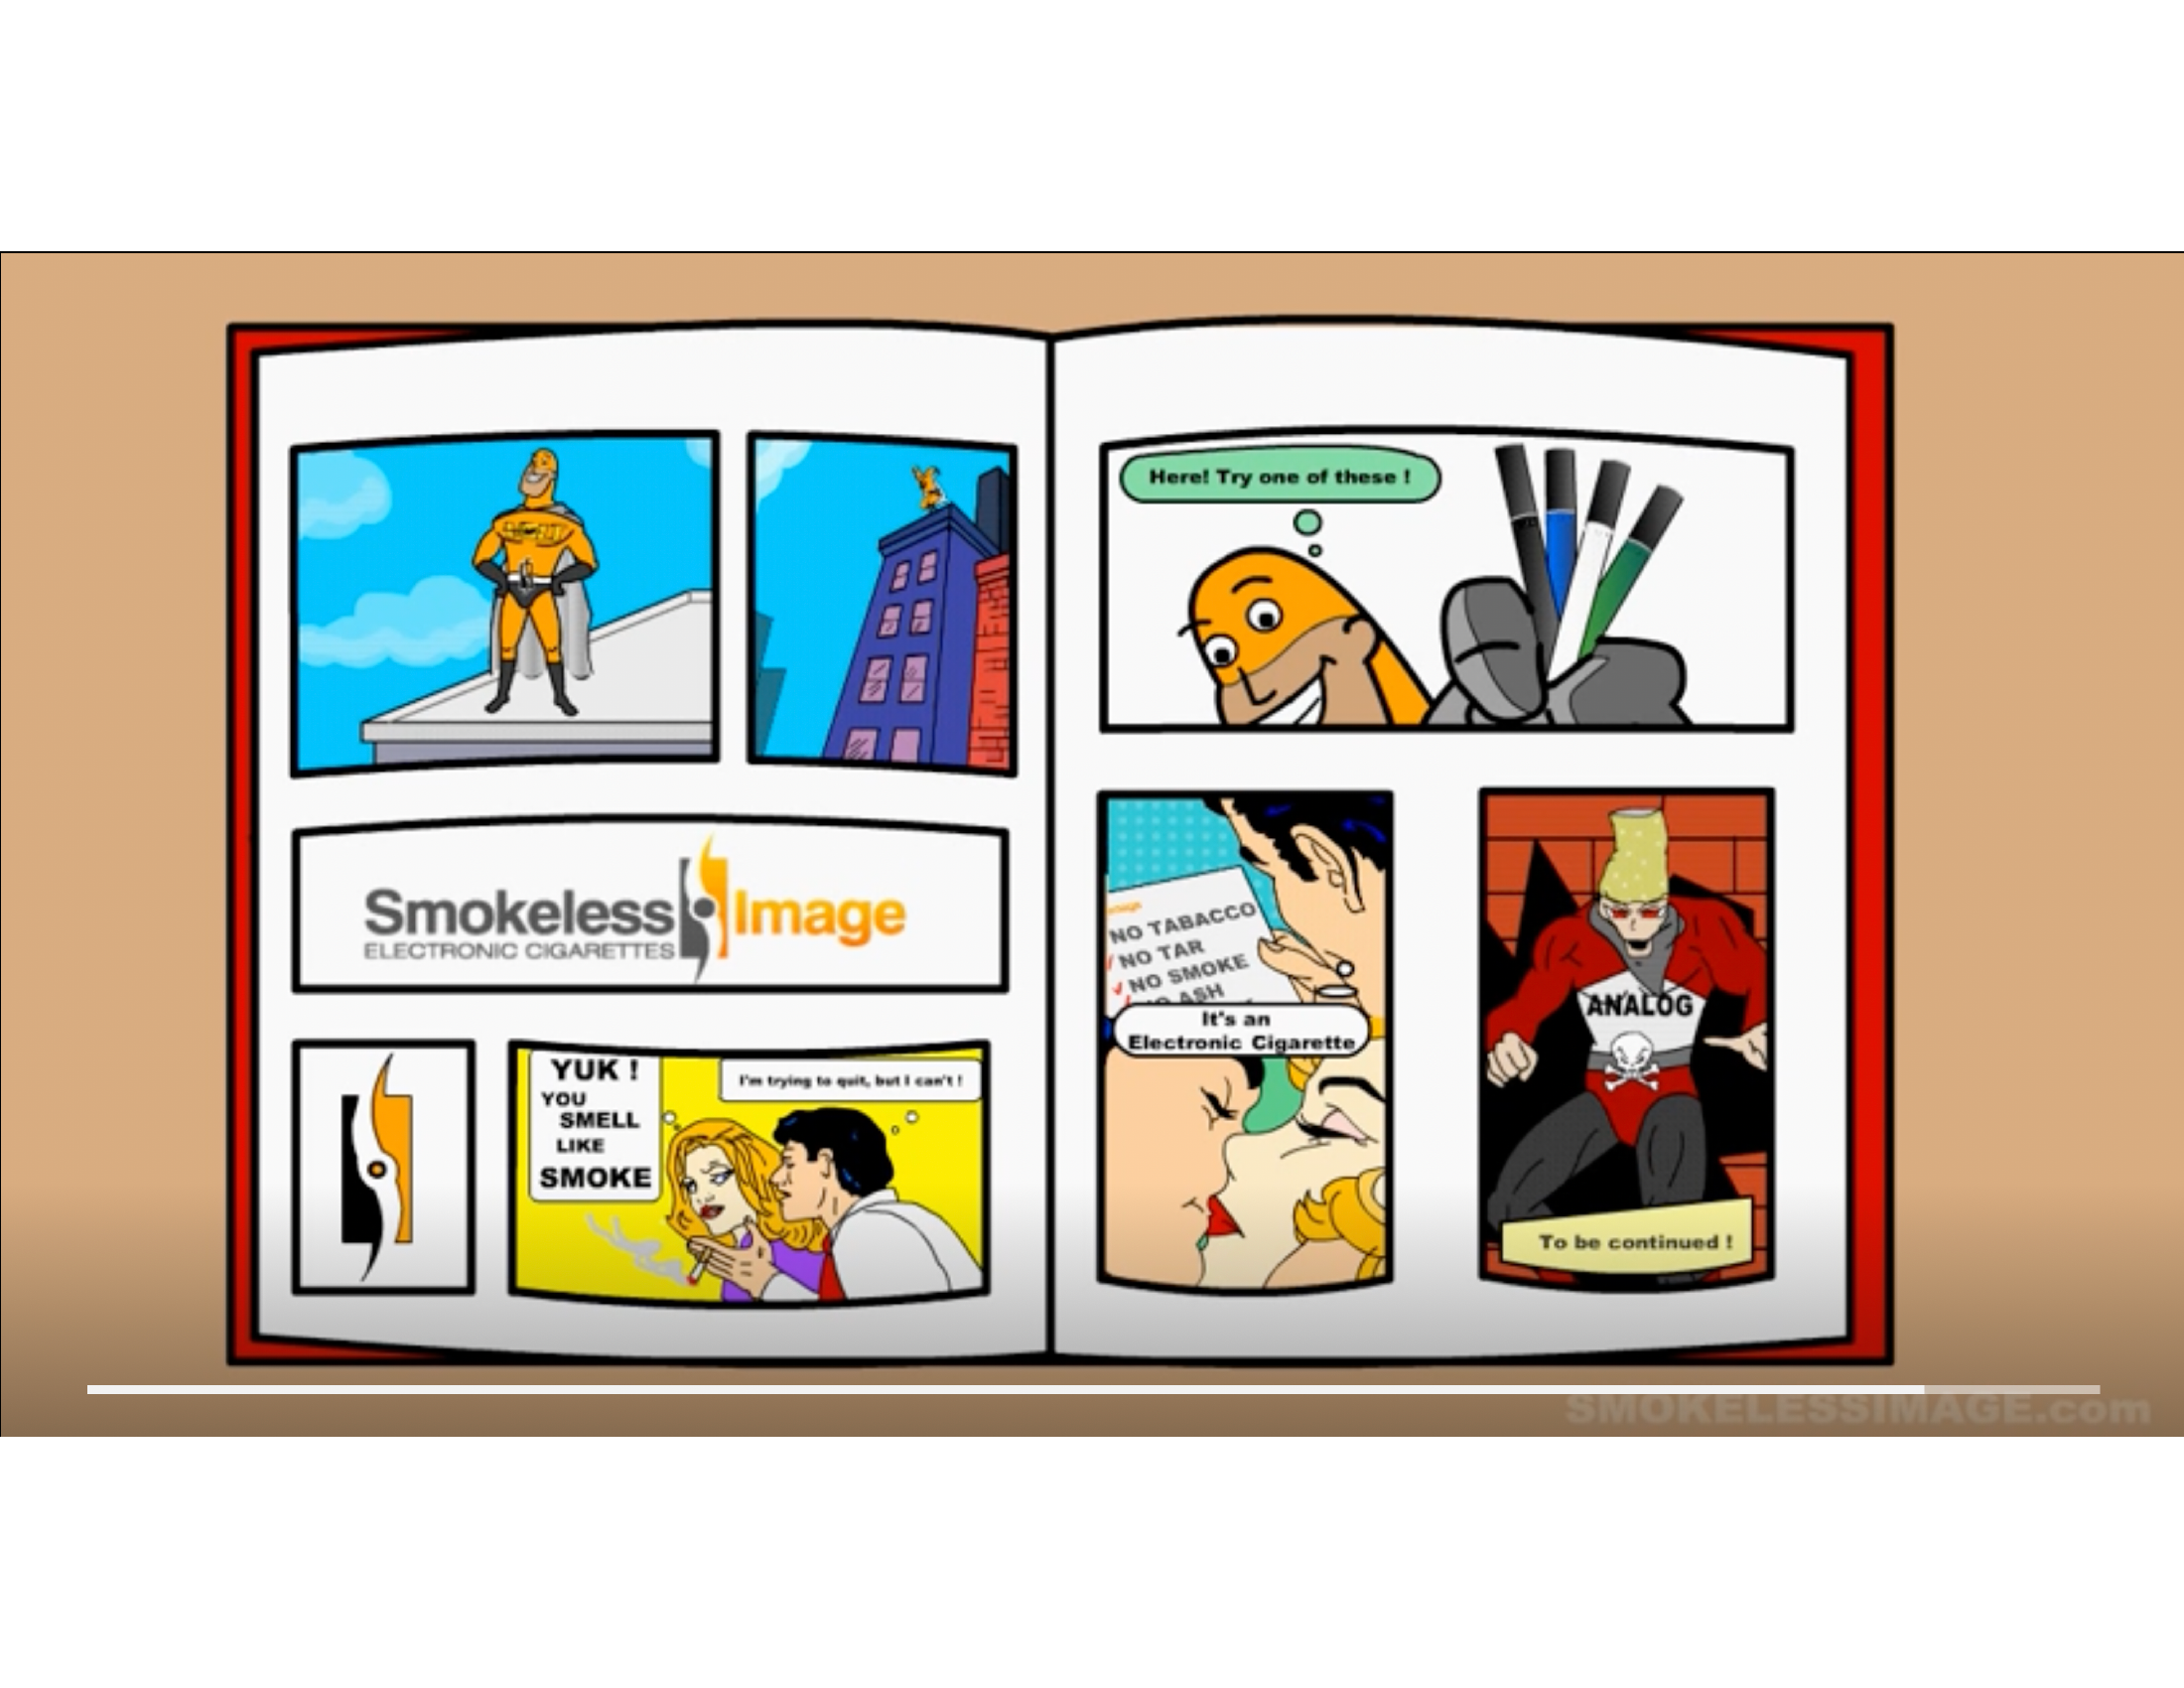

In [17]:
cartoon_imgs[0]

In [18]:
cartoon_string = pytesseract.image_to_string(cartoon_imgs[0])
print(cartoon_string)

 

i

To be continued !

 

 

